   ## Introducción análisis clientes Credit One

En el último año la compañia Credit One ha visto aumentar el número de clientes que han dejado de pagar los préstamos que han obtenido de varios socios.

La intención con este rápido análisis, es intentar determinar en base a los datos, aquellos clientes que pueden en mayor o menor modo, ser un perfil con tendencia a default o no default.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
from sqlalchemy import create_engine
import pymysql
from sqlalchemy import create_engine

In [2]:
# Solicitamos la conexión a la base datos de My Sql

connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [4]:
df= pd.read_sql('SELECT* FROM credit', con= connection)

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [6]:
# Quiero visualizar el nombre de las columnas

df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
# Creo una variable, con los nuevos nombres que asignaré a las columnas.

name=['limit_bal','sex','education','marriage','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6','default']

In [8]:
df.columns= name

In [9]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [13]:
# Consulto los valores de la columna SEX
df[(df['sex']=='SEX')]

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2398,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [15]:
# Voy a eliminar las filas que no necesito en la tabla.
df= df.drop([0,2398])

KeyError: '[0, 2398] not found in axis'

In [16]:
df.dtypes

limit_bal    object
sex          object
education    object
marriage     object
age          object
pay_0        object
pay_2        object
pay_3        object
pay_4        object
pay_5        object
pay_6        object
bill_amt1    object
bill_amt2    object
bill_amt3    object
bill_amt4    object
bill_amt5    object
bill_amt6    object
pay_amt1     object
pay_amt2     object
pay_amt3     object
pay_amt4     object
pay_amt5     object
pay_amt6     object
default      object
dtype: object

Observo que todos los datos, están como objetos. Quiero que sean datos numéricos, así que vamos a corregir esto.

In [18]:
df['limit_bal']= pd.to_numeric(df['limit_bal'])

In [19]:
df['bill_amt1']= pd.to_numeric(df['bill_amt1'])

In [20]:
df['bill_amt2']= pd.to_numeric(df['bill_amt2'])

In [21]:
df['bill_amt3']= pd.to_numeric(df['bill_amt3'])

In [22]:
df['bill_amt4']= pd.to_numeric(df['bill_amt4'])

In [23]:
df['bill_amt4']= pd.to_numeric(df['bill_amt4'])

In [24]:
df['bill_amt5']= pd.to_numeric(df['bill_amt5'])

In [33]:
df['bill_amt6']= pd.to_numeric(df['bill_amt6'])

In [25]:
df['age']= pd.to_numeric(df['age'])

In [26]:
# La columna default no está como un dato numerico. Vamos a transformarlo.
convert = {'default':{'not default':0,'default':1}}

In [27]:
df= df.replace(convert)

In [28]:
# Vamos a consultar el describe ahora con estos datos numéricos.
df.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,default
count,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000,3668.000000
mean,166284.078517,35.354144,51054.570338,49166.293075,45602.332061,41468.667939,39896.160851,0.216739
std,129512.155474,9.438171,76373.892061,74703.121154,69402.888549,67774.636553,63815.838564,0.412080
min,10000.000000,21.000000,-14386.000000,-24704.000000,-9850.000000,-7905.000000,-28335.000000,0.000000
25%,50000.000000,28.000000,3096.000000,3123.000000,2252.000000,1741.500000,1480.500000,0.000000
50%,140000.000000,34.000000,21148.000000,20417.000000,19505.000000,17915.000000,17616.000000,0.000000
75%,230000.000000,41.000000,63638.750000,61162.000000,56272.750000,49324.000000,48449.000000,0.000000
max,1000000.000000,75.000000,964511.000000,983931.000000,548020.000000,891586.000000,927171.000000,1.000000


Se observan algunos datos en negativo en el mínimo de los bill_amt, esto es algo que en principio no debería darse. Así que vamos a investigarlo mejor a continuación.

In [35]:
# Consulta de las filas que tienen un bill_amt1 superior al limit_bal disponible (mes de Abril)
df[df['bill_amt6']>df['limit_bal']][['bill_amt6','limit_bal']].sort_values(by='bill_amt6',ascending=False)

,bill_amt6,limit_bal
1509,699944,480000
3317,352257,240000
919,352257,240000
222,330121,330000
2620,330121,330000
...,...,...
2692,10182,10000
294,10182,10000
1956,10104,10000
3480,10091,10000


In [38]:
round(df['bill_amt6']/df['limit_bal']*100,1)

1        0.0
2        2.7
3       17.3
4       59.1
5       38.3
        ... 
3665    98.9
3666    45.5
3667    16.0
3668    14.4
3669    99.3
Length: 3668, dtype: float64

In [39]:
#Creación de columna con % de clientes de bill_amt6 dividido entre limit_bal.
df['bill%6_bal']=round(df['bill_amt6']/df['limit_bal']*100,1)

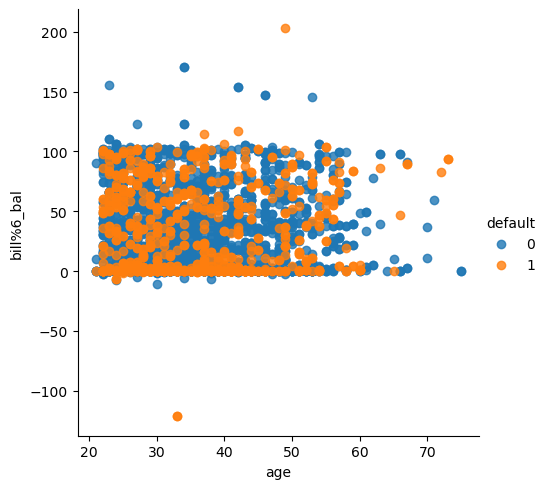

In [42]:
sns.lmplot(data=df, x='age',y='bill%6_bal',hue='default',fit_reg=False)

In [43]:
round(df['bill_amt1']/df['limit_bal']*100,1)

1       19.6
2        2.2
3       32.5
4       94.0
5       17.2
        ... 
3665    88.6
3666    34.6
3667    13.5
3668    11.5
3669    98.0
Length: 3668, dtype: float64

In [44]:
#Creación de columna con % de clientes de bill_amt6 dividido entre limit_bal.
df['bill%1_bal']=round(df['bill_amt1']/df['limit_bal']*100,1)

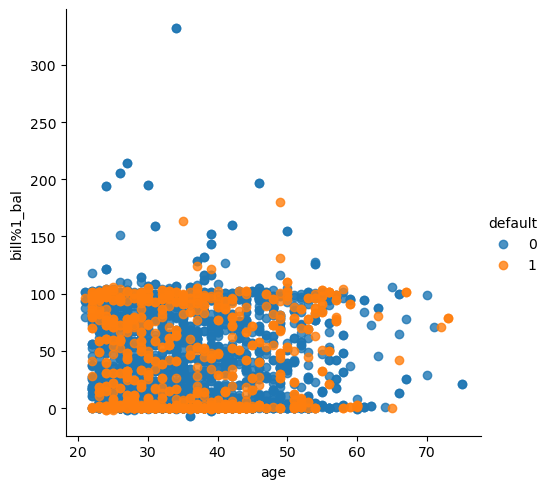

In [45]:
sns.lmplot(data=df, x='age',y='bill%1_bal',hue='default',fit_reg=False)

 Se observa que en el primer mes de bill (6), los clientes que están teniendo un % más alto del 100, son aquellos que están en el grupo de edad 50. En cambio, ya cuando estamos en el último mes de pagos, el grupo de edad varía desde los 30 hasta los 50.
 

### Grado de default según el nivel de estudios.

A continuación vamos a visualizar todos los datos que tenemos sobre el nivel de estudios de los clientes.

In [46]:
# Consulta de los valores totales de la columna education

df['education'].value_counts()

university         1644
graduate school    1401
high school         596
other                27
Name: education, dtype: int64

In [47]:
print('University_default:',(round(100*len(df[(df['education']=='university')&(df['default']==1)])/1644)),'%')
print('University_Notdefault:',(round(100*len(df[(df['education']=='university')&(df['default']==0)])/1644)),'%')
print('Graduate_default:',(round(100*len(df[(df['education']=='graduate school')&(df['default']==1)])/1401)),'%')
print('Graduate_Notdefault:',(round(100*len(df[(df['education']=='graduate school')&(df['default']==0)])/1401)),'%')
print('High_default:',(round(100*len(df[(df['education']=='high school')&(df['default']==1)])/596)),'%')
print('High_Notdefault:',(round(100*len(df[(df['education']=='high school')&(df['default']==0)])/596)),'%')
print('Other_default:',(round(100*len(df[(df['education']=='other')&(df['default']==1)])/27)),'%')
print('Other_Notdefault:',(round(100*len(df[(df['education']=='other')&(df['default']==0)])/27)),'%')

University_default: 23 %
University_Notdefault: 77 %
Graduate_default: 19 %
Graduate_Notdefault: 81 %
High_default: 26 %
High_Notdefault: 74 %
Other_default: 7 %
Other_Notdefault: 93 %


#### Observaciones:
- En este caso, se observa que los clientes que tienen estudios de High School, son los que están mostrando un % mayor de default. 

Vamos a observar esta información más gráficamente.

<AxesSubplot:xlabel='default', ylabel='count'>

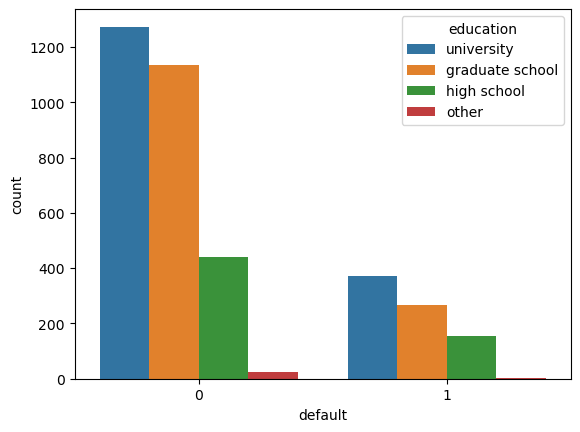

In [48]:
sns.countplot(data=df, x='default',hue='education')

Observaciones: Vemos que en la gráfica, aparentemente los clientes que cuentan con estudios universitarios, son los que mayor default presentan. No obstante, debemos tener en cuenta que los clientes con estudios universitarios son más, que aquellos con High School.

In [50]:
# Creamos una columna nueva con el valor de la edad segmentado por grupos. 
#Utilizanndo la libreria de pandas y la función cut  pd.cut(df['age'],bins=5, labels=[1,2,3,4,5]

df['age_bins'] = pd.cut(df['age'],bins=5, labels=[1,2,3,4,5])

In [51]:
grupo_veinte= (len(df[(df['age_bins']==1)])) #Creación de variables por grupo de edad.
grupo_treinta= (len(df[(df['age_bins']==2)]))
grupo_cuarenta= (len(df[(df['age_bins']==3)]))
grupo_cinquenta= (len(df[(df['age_bins']==4)]))
grupo_mas_sesenta= (len(df[(df['age_bins']==5)]))

In [52]:
print('20_Default:',round(100*len(df[(df['default']==1)&(df['age_bins']==1)])/grupo_veinte,2),'%')
print('20_Not_Default:',round(100*len(df[(df['default']==0)&(df['age_bins']==1)])/grupo_veinte,2),'%')
print('30_Default:',round(100*len(df[(df['default']==1)&(df['age_bins']==2)])/grupo_treinta,2),'%')
print('30_Not_Default:',round(100*len(df[(df['default']==0)&(df['age_bins']==2)])/grupo_treinta,2),'%')
print('40_Default:',round(100*len(df[(df['default']==1)&(df['age_bins']==3)])/grupo_cuarenta,2),'%')
print('40_Not_Default:',round(100*len(df[(df['default']==0)&(df['age_bins']==3)])/grupo_cuarenta,2),'%')
print('50_Default:',round(100*len(df[(df['default']==1)&(df['age_bins']==4)])/grupo_cinquenta,2),'%')
print('50_Not_Default:',round(100*len(df[(df['default']==0)&(df['age_bins']==4)])/grupo_cinquenta,2),'%')
print('60mas_Default:',round(100*len(df[(df['default']==1)&(df['age_bins']==5)])/grupo_mas_sesenta,2),'%')
print('60mas_Not_Default:',round(100*len(df[(df['default']==0)&(df['age_bins']==5)])/grupo_mas_sesenta,2),'%')

20_Default: 21.24 %
20_Not_Default: 78.76 %
30_Default: 20.13 %
30_Not_Default: 79.87 %
40_Default: 22.94 %
40_Not_Default: 77.06 %
50_Default: 32.48 %
50_Not_Default: 67.52 %
60mas_Default: 33.33 %
60mas_Not_Default: 66.67 %


#### Observaciones:

Según el % y los gráficos, aquellos clientes que se encuentran en los grupos:

- 20-30: Suelen tener un % de default de 21,24%, en comparación con los clientes que son not_default con un 78,76%.
- En cambio, teniendo en cuenta que el grupo de 50-60 y los mayores de 60, aún y siendo pocos en el número de clientes, tienen un % de default de 32,38% (50-60) y un 33,33% (+60)

### Conclusiones:

Se observa que, aunque el dato de mujeres es más elevado, el % en clientes que realizan default es 1% mayor en los hombres.

En este caso, se observa que los clientes que tienen estudios de High School, son los que están mostrando un % mayor de default.

Podríamos deducir que, los clientes que son hombres, con edades comprendidas entre los 20-30 años,con un nivel de estudios High School, solteros; son los que pueden tener una mayor tendencia en generar default.